In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import mmcv
import importlib
import torch
import torchvision.transforms as transforms
from mmcv import Config
from mmcls.datasets.pipelines import Compose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from PIL import Image
import heapq
from mmseg.apis import inference_segmentor, init_segmentor
from mmseg.core.evaluation import get_palette
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2

import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

from scripts import generate_statistics_single
from scripts import visualization_seg_masks
from scripts import generate_statistics
from scripts import generate_cams
from scripts import utils
from scripts.utils.pipeline import get_pipeline_torchvision
from scripts import generate_segs
from scripts import visualize_cam_results

In [3]:
configSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/ocrnet_hr48_512x512_carparts_noflip.py'
checkpointSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth'
imgRootTrain = '../data/CompCars_sv_original_split/train'
imgRootVal = '../data/CompCars_sv_original_split/val'
configCAMResOG = '../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py'
checkpointCAMResOG = '../CAMModels/resnet/compCars_Original/latest.pth'
configCAMSwinSmallOG = '../CAMModels/swinSmall/compCars_Original/swin-small_b128x2_compcars-original-split.py'
checkpointCAMSwinSmallOG = '../CAMModels/swinSmall/compCars_Original/latest.pth'
annfileTrain = '../annfileTrain.txt'
annfileVal = '../annfileVal.txt'
annfileValGt = '../annfileValGt.txt'
imgNameTrain='Acura_Acura_ILX_2a6cce617fc27d.jpg'
imgNameVal = 'Acura_Acura_ILX_3c11ef9e42931b.jpg'
imgPathTrain=os.path.join(imgRootTrain, imgNameTrain)
imgPathVal=os.path.join(imgRootVal, imgNameVal)

paletteName='Comp_Original_Ocrnet_Carparts_Noflip'

segDataPath = 'G:/XAI-Vehicle-Classification/preGenData/Segmentations/CompCars_Original/valAllSegs.npz'

camDataGradCAM = 'G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMs.npz'
camDataEigenCAM = 'G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMsEigen.npz'
camDataEigenGrad = 'G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMsEigenGrad.npz'
camDataGradCAMGPU = 'G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMsGPU.npz'
camDataGradCAMPlusPlus = 'G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMsGrad++.npz'
camDataLayerCAM = 'G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMsLayer.npz'
camDataXCAM = 'G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMsXGrad.npz'

Created filtered annotation file at annfile_filtered.txt
Evaluating Model on GPU
Determining wrongly classified samples.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 104/104, 21.8 task/s, elapsed: 5s, ETA:     0s
Number of correctly classified samples: 92
Number of incorrectly classified samples: 12
Removing filtered annotation file annfile_filtered.txt
Creating annotation file at annfile_correct.txt
Creating annotation file at annfile_incorrect.txt
Using given Segmentation Data.
Loading data from file at G:/XAI-Vehicle-Classification/preGenData/Segmentations/CompCars_Original/valAllSegs.npz
Using given CAM Data.
Loading data from file at G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMs.npz


C:\Users\Linus\Desktop\XAI-Vehicle-Classification\scripts\utils\prepareData.py:120: UserWarning: No pipeline is applied since segData is provided. If pipeline should be applied specify by pipelineCfg parameter.
  warnings.warn('No pipeline is applied since segData is provided. If pipeline should be applied specify '


Using given Segmentation Data.
Loading data from file at G:/XAI-Vehicle-Classification/preGenData/Segmentations/CompCars_Original/valAllSegs.npz
Using given CAM Data.
Loading data from file at G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMs.npz
Using given Segmentation Data.
Loading data from file at G:/XAI-Vehicle-Classification/preGenData/Segmentations/CompCars_Original/valAllSegs.npz
Using given CAM Data.
Loading data from file at G:/XAI-Vehicle-Classification/preGenData/CompCars_original/ResNet/valAllCAMs.npz
Method for CAM generation: gradcam, eigen-smooth:False, aug-smooth:False, vit-like:False
Using annotation labels provided by the annfile.
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 12/12, 4.9 task/s, elapsed: 2s, ETA:     0s
Accumulating Statistics for given imgNames.
Accumulating Statistics for given imgNames.
Accumulating Statistics for given imgNames.
Accumul

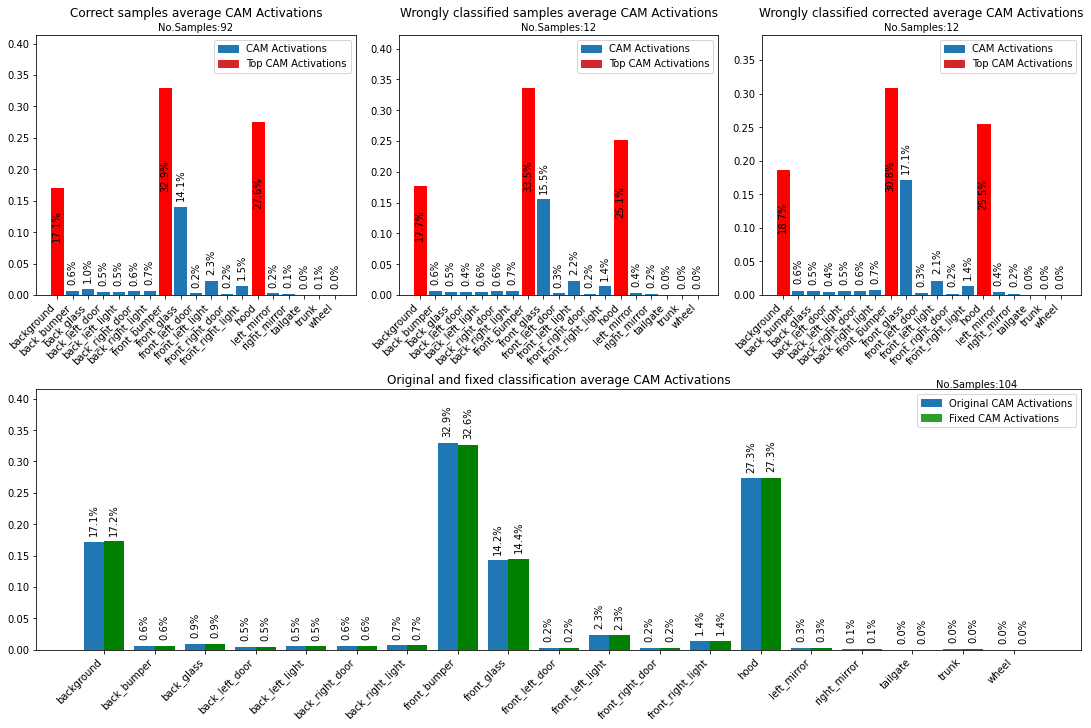

Output path is not a directory. Using base directory: ./results\wronglyClassifications.
Saving images to: ./results\wronglyClassifications\Full_valAllCAMs_CAM-Predefined_CAM-Predefined_SEG-Predefined_valAllSegs_20_08_2022.jpg
Generate excel file for results.
Using specified dictionary keys as column names
Saving excel to wronlyClassifiedResults.xlsx.


In [36]:
generate_statistics.generate_statistics_missclassified(imgRoot=imgRootVal, camConfig=configCAMResOG, 
                                                       camCheckpoint=checkpointCAMResOG, camData=camDataGradCAM,
                                                       segData=segDataPath, method='gradcam', segConfig=configSeg,
                                                       segCheckpoint=checkpointSeg, annfile=annfileValGt)